# Data Visualisation Portfolio Project
## Life Expectancy and GDP

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.

After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website.


### Project Objectives
1. Use seaborn and Matplotlib to create visualizations
2. Become familiar with presenting and sharing data visualizations
3. Preprocess, explore, and analyze data

### Project Goals
Identify the relationship between the GDP and life expectancy of six countries using data from the World Health Organisation and World Bank.

### Data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np

df = pd.read_csv('all_data.csv')

In [2]:
num_lines = len(df)
columns = len(df.columns)
print('There are {} lines and {} columns in this dataset.'.format(num_lines, columns))

column_names = df.columns.values
num_countries = df.Country.nunique()
countries = df.Country.unique()
num_years = df.Year.nunique()
years = df.Year.unique()
print('''Data about the {} countries in 1. below is collected over \
the {} years in 2. In 3. we detail the name of the columns for this data.\n\
1. {}\n2. {}\n3.{}\n\nThere are no missing data.'''.format(num_countries, num_years, countries, years, column_names))

There are 96 lines and 4 columns in this dataset.
Data about the 6 countries in 1. below is collected over the 16 years in 2. In 3. we detail the name of the columns for this data.
1. ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
2. [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
3.['Country' 'Year' 'Life expectancy at birth (years)' 'GDP']

There are no missing data.


### Analysis

First, let's visualise the data for each country using line plots.

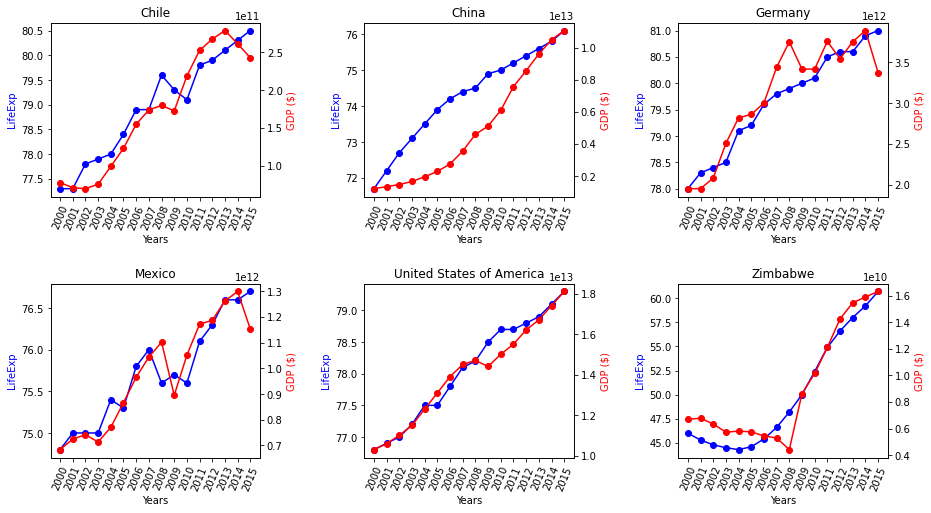

In [3]:
plt.figure(figsize=(15,8))

for i in range(num_countries):
 ax = plt.subplot(2,3,i+1)
 ax.plot(years, df['Life expectancy at birth (years)'][df.Country == countries[i]], color = 'blue', marker = 'o', label = 'Life Expectancy')
 ax.set_ylabel('LifeExp', color = 'blue')
 ax.set_xticks(years)
 ax.set_xticklabels(years, rotation = 67.5)
 ax2 = ax.twinx()
 ax2.plot(years, df['GDP'][df.Country == countries[i]], color = 'red', marker = 'o', label = 'GDP')
 ax2.set_ylabel('GDP ($)', color = 'red')
 ax.set_xlabel('Years')
 plt.title(countries[i])

plt.subplots_adjust(wspace = .5, hspace = .5)
plt.show()

Now, let's look at the relationship between a country's Life Expectancy and its GDP

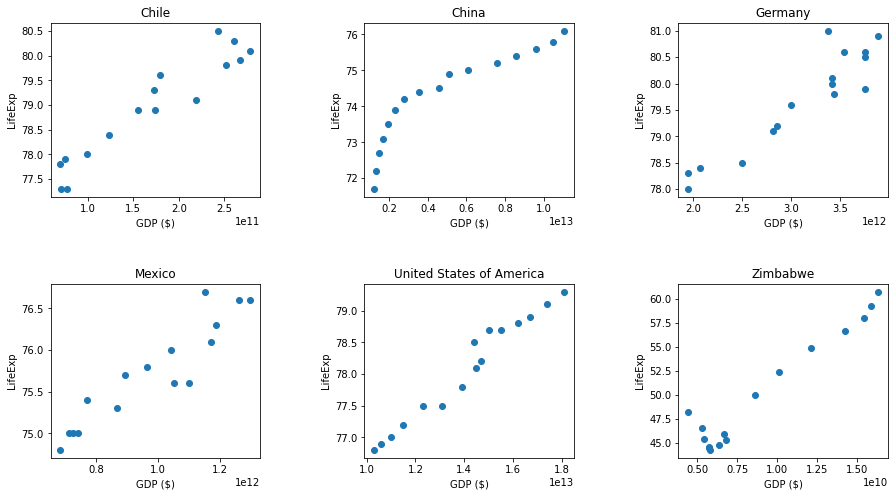

In [4]:
plt.figure(figsize=(15,8))

for i in range(num_countries):
    ax = plt.subplot(2,3,i+1)
    slope, intercept, r_value,p_value,std_err = stats.linregress(df['GDP'][df.Country == countries[i]],df['Life expectancy at birth (years)'][df.Country == countries[i]])
    #x = list(range(int(df['GDP'][df.Country == countries[i]].max())))
    #y = [slope*item + intercept for item in x]
    ax.scatter(df['GDP'][df.Country == countries[i]], df['Life expectancy at birth (years)'][df.Country == countries[i]])
    #plt.plot(x, y)
    ax.set_xlabel('GDP ($)')
    ax.set_ylabel('LifeExp')
    plt.title(countries[i])

plt.subplots_adjust(wspace = .5, hspace = .5)
plt.show()

In [5]:
plt.figure(figsize=(15,7))

for i in range(len(countries)):
    df1 = df[df.Country == countries[i]]
    slope, intercept, r_value,p_value,std_err = stats.linregress(df1['GDP'], df1['Life expectancy at birth (years)'])
    print('The r^2 value for {} is {:.3f}'.format(countries[i], r_value**2))

The r^2 value for Chile is 0.902
The r^2 value for China is 0.825
The r^2 value for Germany is 0.870
The r^2 value for Mexico is 0.869
The r^2 value for United States of America is 0.964
The r^2 value for Zimbabwe is 0.934


<Figure size 1080x504 with 0 Axes>

The r^2 value for all graphs is greater than .8 and we can therefore conclude there is a strong linear association between GDP and life expectancy for all of them.

Below, we visualise countries' GDP and Life Expectancy against each other.

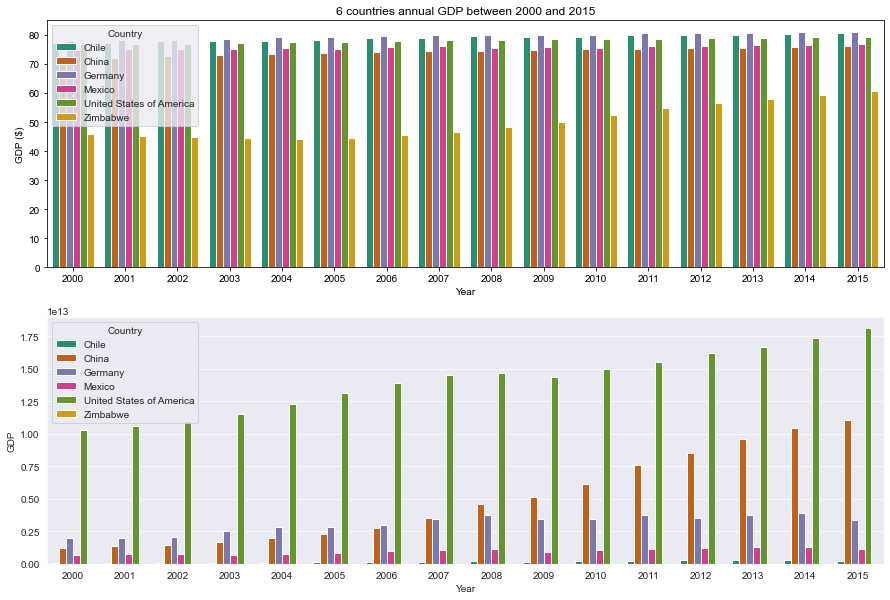

In [6]:
plt.figure(figsize=(15,10))
ax = plt.subplot(2,1,1)
sns.set_palette('Dark2')
sns.set_style('darkgrid')
ax = sns.barplot(data = df, x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country')

ax1 = plt.subplot(2,1,2)
sns.set_palette('Dark2')
sns.set_style('darkgrid')
ax.set(title = '6 countries annual GDP between 2000 and 2015', ylabel = 'GDP ($)')
ax1 = sns.barplot(data = df, x = 'Year', y = 'GDP', hue = 'Country')

Though these graphs give us a good sense of the comparative Life Expectancy and GDP for the six countries in question, it's difficult to see if there is a pattern between a country's LifeExp and GDP across these 6 countries.
Let's visualise this on a year by year basis:
UPDATE: I've decided to normalise the GDP by population, thereby evaluating GDP/capita
Population data source: https://data.worldbank.org/indicator/SP.POP.TOTL

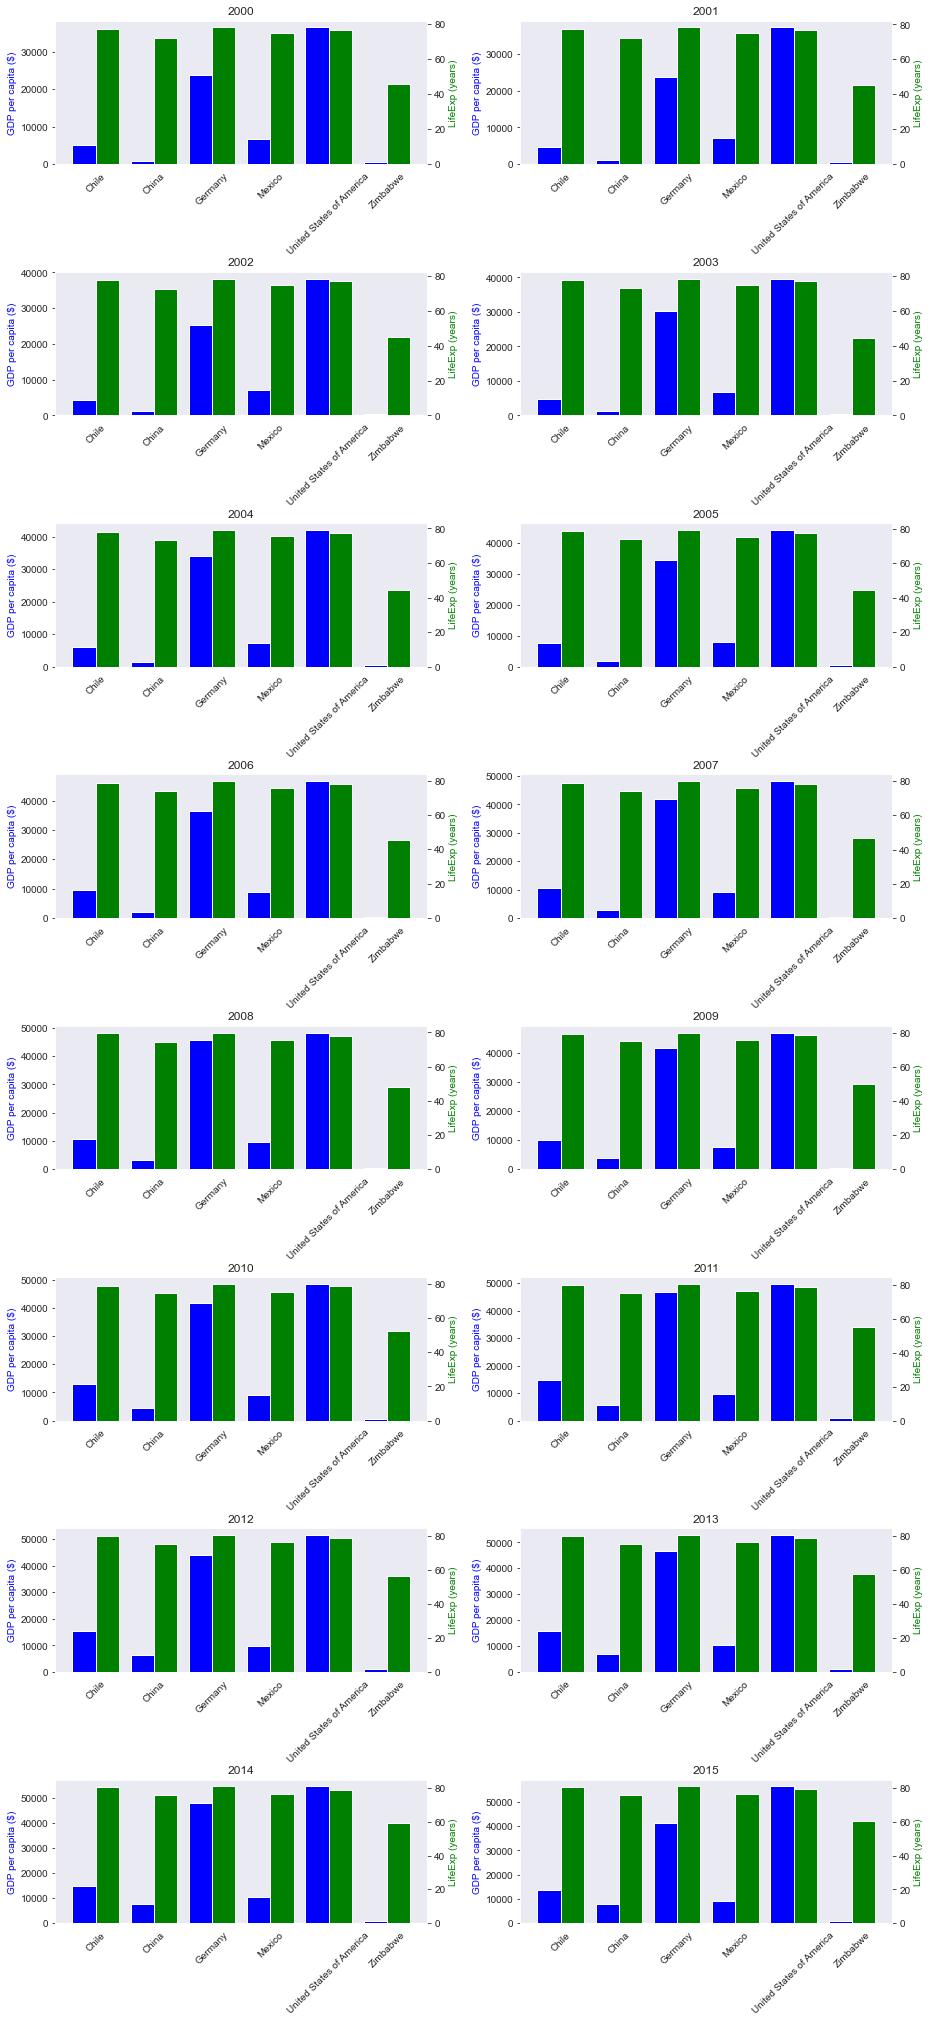

In [30]:
population = pd.read_csv('population_country.csv')
df['GDP per capita'] = df.GDP / population.Population

plt.figure(figsize=(15,35))

n = 1
t = 2
d = len(countries)
w = .8

x1 = [t*element + n*w for element in range(d)]

n = 2

x2 = [t*element + n*w for element in range(d)]
middle_x = [(a+b)/2 for a,b in zip(x1, x2)]

for i in range(len(years)):
    gdp = df['GDP per capita'][df.Year == years[i]]
    life_exp = df['Life expectancy at birth (years)'][df.Year == years[i]]
    
    ax1 = plt.subplot(8,2,i+1)
    sns.set_style('dark')
    plt.bar(x1, gdp, color = 'blue')
    ax1.set_xticks(middle_x)
    ax1.set_xticklabels(countries, rotation = 45)
    plt.ylabel('GDP per capita ($)', color = 'blue')
    plt.title(years[i])
    ax2 = ax1.twinx()
    plt.bar(x2, life_exp, color = 'green')
    plt.ylabel('LifeExp (years)', color = 'green')
    plt.subplots_adjust(hspace = .75, wspace = .25)

Let's look at the evolution of the average GDP and average Life Expectancy

<AxesSubplot:xlabel='Year', ylabel='Life expectancy at birth (years)'>

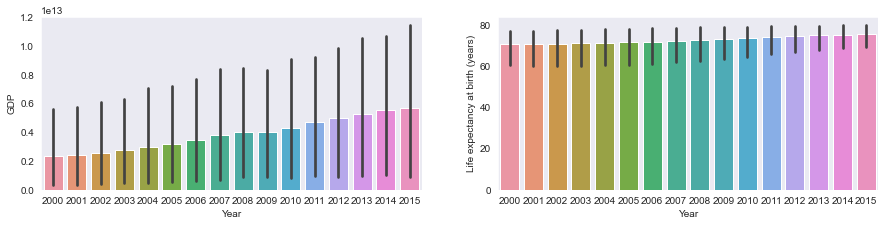

In [10]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.barplot(data = df, x = 'Year', y = 'GDP')

plt.subplot(2,2,2)
sns.barplot(data = df, x = 'Year', y = 'Life expectancy at birth (years)')

No clear correlation at the dataset level. Let's show this by

Text(28000, 72, 'P value = 3.889298569621623e-11 \nR squared = 0.43066494205060607')

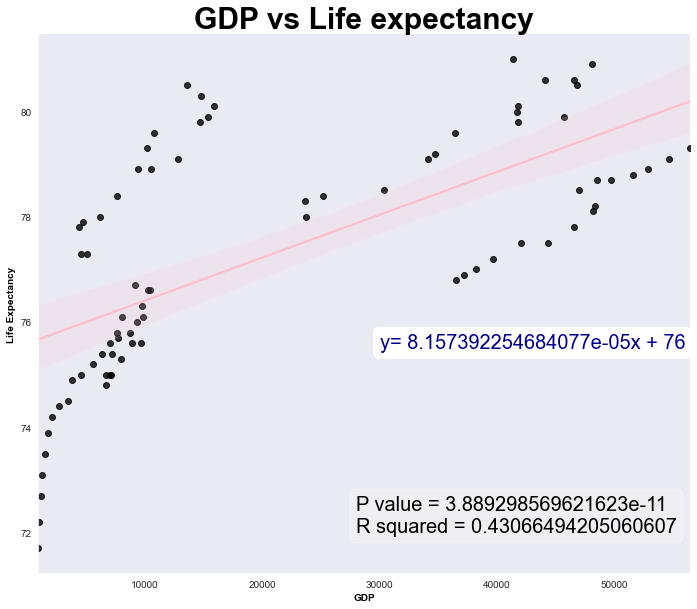

In [28]:
df2 = df[df.Country != 'Zimbabwe']
slope, intercept, r_value,p_value,std_err = stats.linregress(df2['GDP per capita'], df2['Life expectancy at birth (years)'])

#create text variables for linear equation, r and p-value
line_equation = f'y= {slope}x + {intercept:.0f}'
r_p_value = f"""P value = {p_value} 
R squared = {r_value**2}"""

#textbox properties
box1 = dict(boxstyle='round', facecolor='white', alpha=1)
box2 = dict(boxstyle='round', facecolor='whitesmoke', alpha=.5)


graph = sns.lmplot(data=df2,x='GDP per capita',y='Life expectancy at birth (years)',height = 8,aspect = 1.2,scatter_kws = {'color':'black'},line_kws = {'color':'pink'})
plt.ylabel('Life Expectancy',fontweight='semibold',color='black')
plt.title('GDP vs Life expectancy',fontsize=30,fontweight='semibold',color='black')
plt.xlabel('GDP',fontweight='semibold',color='black')
plt.text(30000,75.5,line_equation,fontsize=20,color='darkblue',bbox=box1)
plt.text(28000,72,r_p_value,fontsize=20,color='black',bbox=box2)

Though there is some positive correlation between GDP and life expectancy regardless of the country (improved by removing Zimbabwe's data), it is still weak and we cannot draw a conclusion of linear association at the scale of the 6 countries in this dataset.